      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    

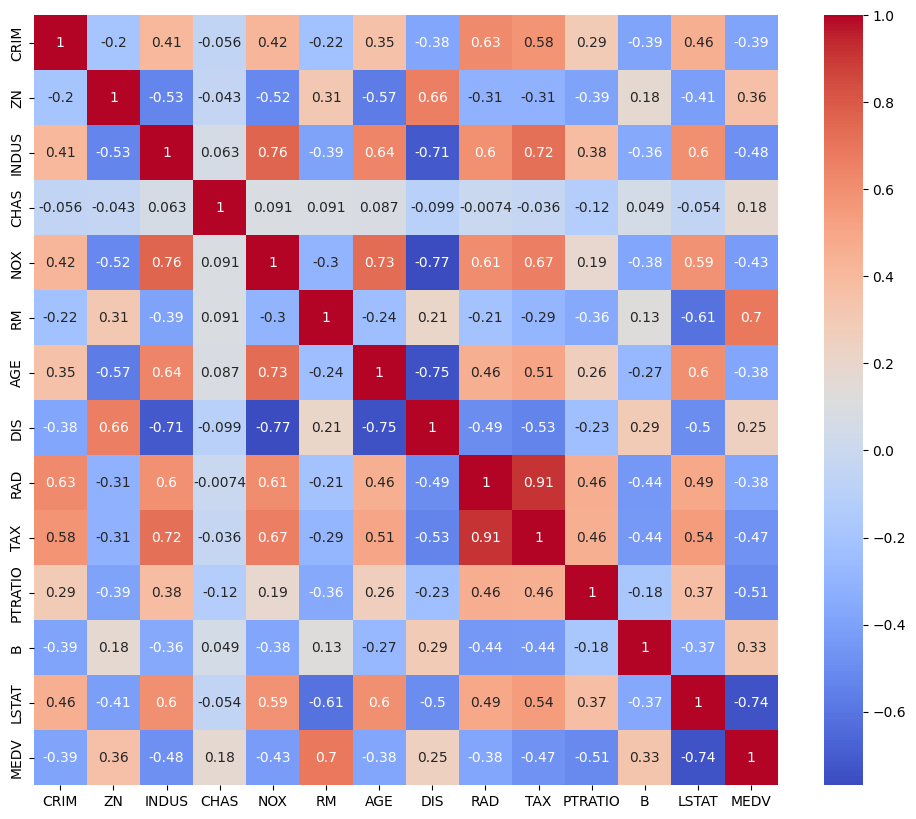

Top correlated features with MEDV:
 MEDV    1.000000
RM      0.695360
ZN      0.360445
B       0.333461
DIS     0.249929
CHAS    0.175260
AGE    -0.376955
RAD    -0.381626
CRIM   -0.388305
NOX    -0.427321
Name: MEDV, dtype: float64


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Load Boston Housing dataset from openml (since load_boston is deprecated)
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Rename target column for clarity
df.rename(columns={'MEDV': 'MEDV'}, inplace=True)

# Explore dataset
print(df.head())
print(df.info())
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Check correlation of features with target 'MEDV'
corr_target = df.corr()['MEDV'].sort_values(ascending=False)
print("Top correlated features with MEDV:\n", corr_target.head(10))


Simple Linear Regression Performance:
R2 score: 0.3707569232254778
MAE: 4.478335832064149
RMSE: 6.792994578778734


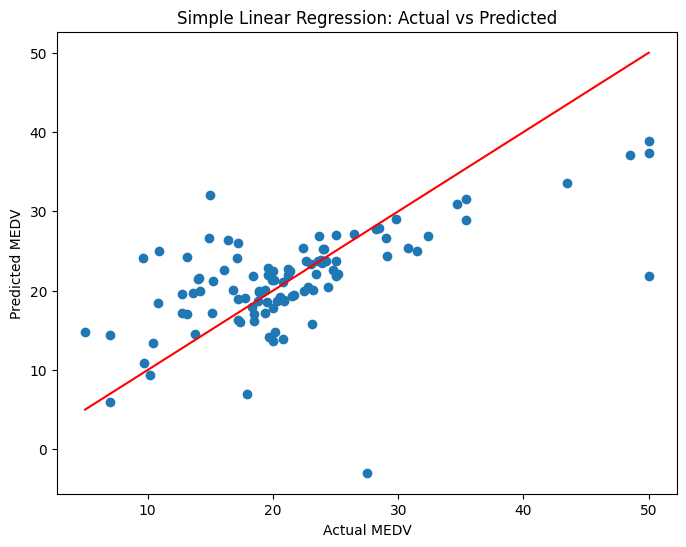

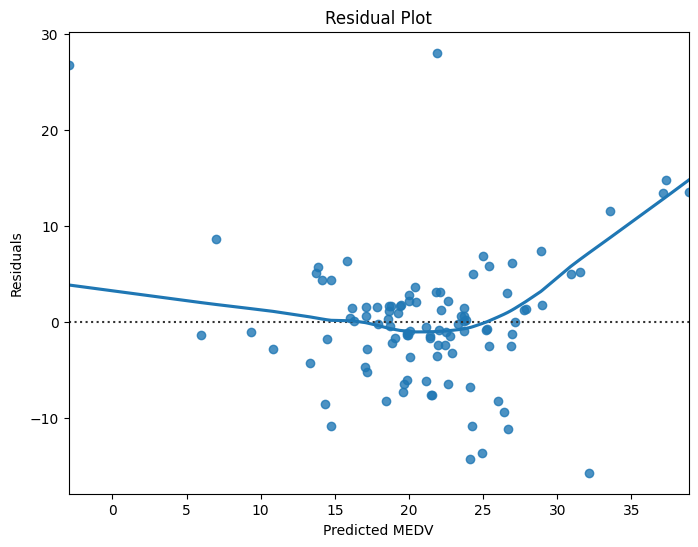

In [3]:
#Simple Linear Regression: MEDV ~ RM
# Select feature and target
X = df[['RM']]   # RM = average rooms per dwelling
y = df['MEDV']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

# Predict on test
y_pred_simple = simple_lr.predict(X_test)

# Evaluate
print("Simple Linear Regression Performance:")
print("R2 score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_simple)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45 degree line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.show()

# Residual plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred_simple, y=(y_test - y_pred_simple), lowess=True)
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Top 5 features used: ['RM', 'ZN', 'B', 'DIS', 'CHAS']
Multiple Linear Regression Performance:
R2 score: 0.4522559546702334
MAE: 3.959928558642936
RMSE: 6.33783425529346


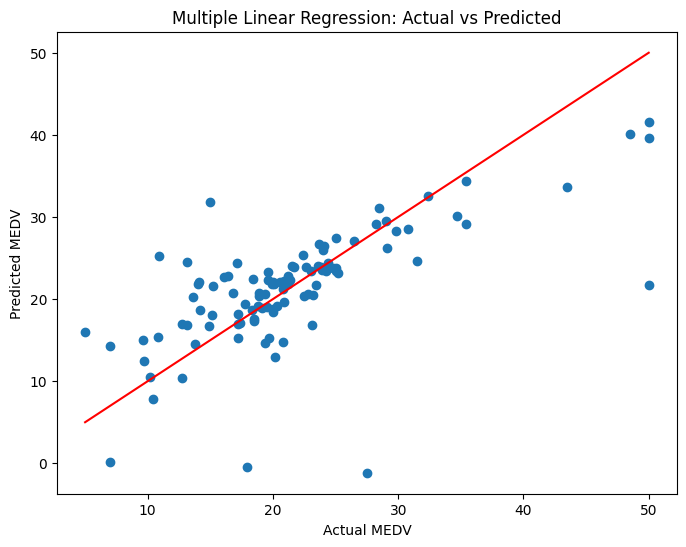

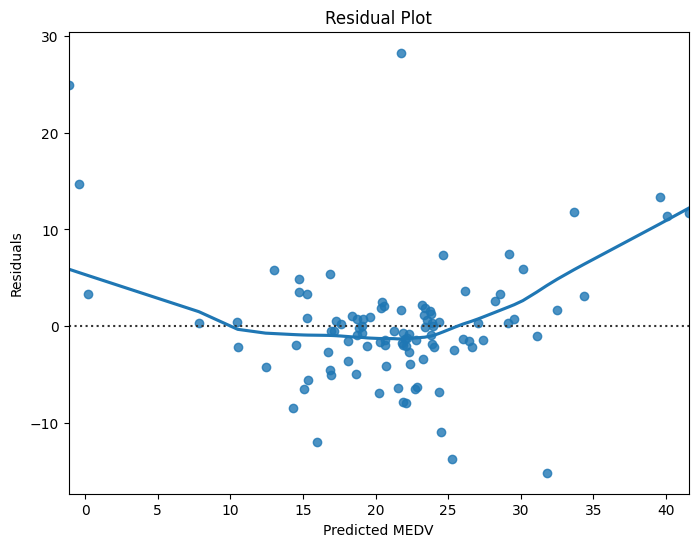

In [25]:
top_features = corr_target.index[1:6].tolist()
print("Top 5 features used:", top_features)

X_multi = df[top_features].copy()

# Convert 'CHAS' column to numerical if it exists
if 'CHAS' in X_multi.columns:
    X_multi['CHAS'] = X_multi['CHAS'].astype(float)


y = df['MEDV']

# Split train/test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train model
multi_lr = LinearRegression()
multi_lr.fit(X_train_m, y_train_m)

# Predict
y_pred_multi = multi_lr.predict(X_test_m)

# Evaluate
print("Multiple Linear Regression Performance:")
print("R2 score:", r2_score(y_test_m, y_pred_multi))
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_multi)))

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test_m, y_pred_multi)
plt.plot([min(y_test_m), max(y_test_m)], [min(y_test_m), max(y_test_m)], color='red')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()


# Residual plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred_multi, y=(y_test_m - y_pred_multi), lowess=True)
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [26]:
coefficients = pd.DataFrame({'Feature': top_features, 'Coefficient': multi_lr.coef_})
print(coefficients)

  Feature  Coefficient
0      RM     8.484301
1      ZN     0.045130
2       B     0.025539
3     DIS    -0.125744
4    CHAS     3.966011
